In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time

In [2]:
path=r"C:\Users\Anand\Desktop\Python\Project-2"

In [3]:
caravan_train=pd.read_csv(r"C:\Users\Anand\Desktop\Python\Project-2\carvan_train.csv")
train=pd.read_csv(r"C:\Users\Anand\Desktop\Python\Project-2\carvan_train.csv")
caravan_test=pd.read_csv(r"C:\Users\Anand\Desktop\Python\Project-2\carvan_test.csv")

In [5]:
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [6]:
train["V86"].value_counts(normalize=True)

0    0.940227
1    0.059773
Name: V86, dtype: float64

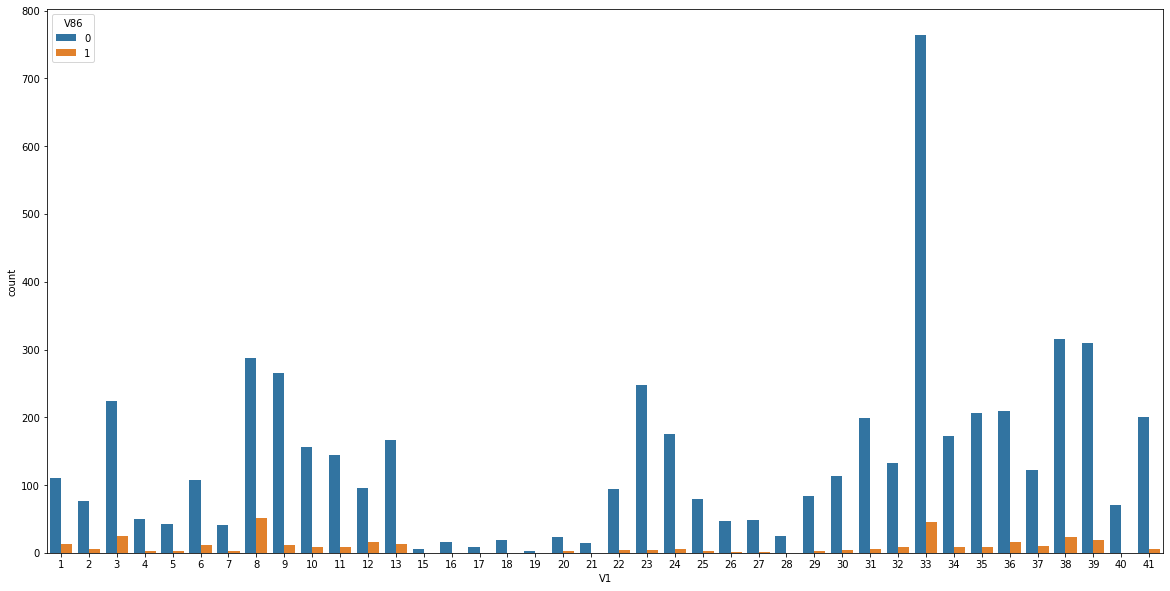

In [7]:
plt.figure(figsize=(20,10))
sns.countplot(x="V1", hue="V86", data=train)

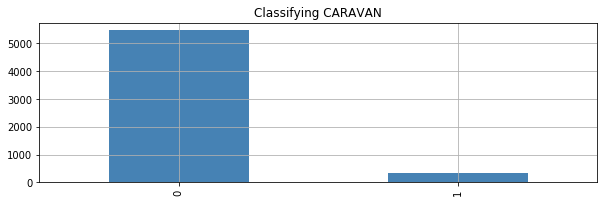

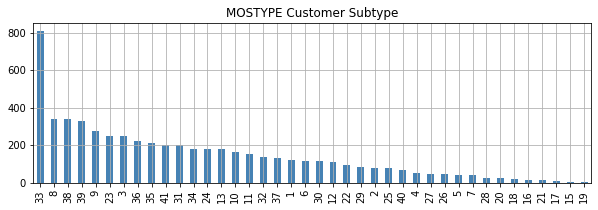

In [8]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
train["V86"].value_counts().plot(kind='bar', title='Classifying CARAVAN', color='steelblue', grid=True)

plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
train["V1"].value_counts().plot(kind='bar', title='MOSTYPE Customer Subtype', color='steelblue', grid=True)

Text(0, 0.5, 'Caravan or not')

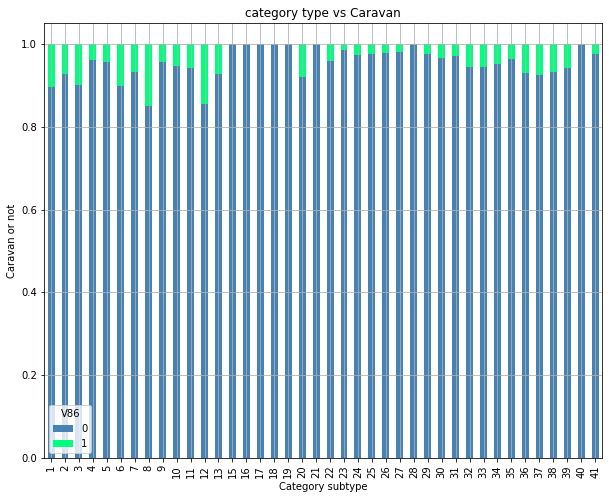

In [9]:
categorysubtype_caravan = pd.crosstab(train['V1'],train["V86"])
categorysubtype_caravan_pct = categorysubtype_caravan.div(categorysubtype_caravan.sum(1).astype(float), axis=0)
categorysubtype_caravan_pct.plot(figsize= (10,8), kind='bar', stacked=True, color=['steelblue', 'springgreen'], title='category type vs Caravan',grid=True)
plt.xlabel('Category subtype')
plt.ylabel('Caravan or not')


In [10]:
##MGEMLEEF Avg age see L1: V4
#1 20-30 years
#2 30-40 years
#3 40-50 years
#4 50-60 years
#5 60-70 years
#6 70-80 years

train["V4"].value_counts()

3    3000
2    1452
4    1073
5     193
1      74
6      30
Name: V4, dtype: int64

V86         0         1
V4                     
1    0.986486  0.013514
2    0.940083  0.059917
3    0.939000  0.061000
4    0.940354  0.059646
5    0.937824  0.062176
6    0.966667  0.033333


(<matplotlib.axes._subplots.AxesSubplot at 0x22e86da6848>, None)

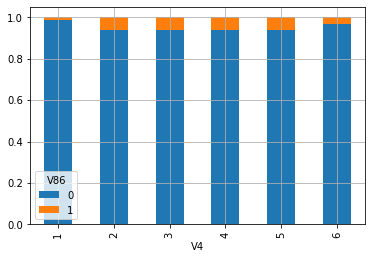

In [11]:
cross_Age=pd.crosstab(train["V4"],train["V86"])
cross_Age_pct=cross_Age.div(cross_Age.sum(1).astype(float),axis=0)
cross_Age_pct.plot(kind="bar",stacked=True,grid=True), print(cross_Age_pct)

In [11]:
#V5 MOSHOOFD Customer main type see L2, 
#1 Successful hedonists
#2 Driven Growers
#3 Average Family
#4 Career Loners
#5 Living well
#6 Cruising Seniors
#7 Retired and Religeous
#8 Family with grown ups
#9 Conservative families
#10 Farmers

V86         0         1
V5                     
1    0.913043  0.086957
2    0.868526  0.131474
3    0.933409  0.066591
4    1.000000  0.000000
5    0.973638  0.026362
6    0.980488  0.019512
7    0.963636  0.036364
8    0.943058  0.056942
9    0.937031  0.062969
10   0.981884  0.018116


(<matplotlib.axes._subplots.AxesSubplot at 0x22e87203688>, None)

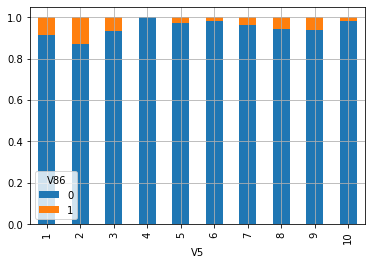

In [12]:
customer_type=pd.crosstab(train["V5"],train["V86"])
customer_type_pct=customer_type.div(customer_type.sum(1).astype(float),axis=0)
customer_type_pct.plot(kind="bar",stacked=True,grid=True), print(customer_type_pct)

In [13]:
#V44 PWAPART Contribution private third party insurance see L4
#V7


In [14]:
train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51',
       'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61',
       'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71',
       'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81',
       'V82', 'V83', 'V84', 'V85', 'V86'],
      dtype='object')

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [16]:
test1=train["V86"]
train1=train.drop(["V86"],axis=1)

In [17]:
#Data is imbalance. Hence, we are doing oversampling the data by SMOTE()

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
oversample=SMOTE()

In [20]:
train1, test1=oversample.fit_resample(train1,test1)

In [21]:
test1.value_counts()

1    5474
0    5474
Name: V86, dtype: int64

In [22]:
train1.shape, test1.shape

((10948, 85), (10948,))

In [23]:
train1["V86"]=test1

In [24]:
#Split the training data into train and test
train, test=train_test_split(train1,test_size=0.2)
train.shape, test.shape

((8758, 86), (2190, 86))

In [25]:
x_train=train.drop("V86", axis=1)
y_train=train["V86"]

x_test=test.drop("V86", axis=1)
y_test=test["V86"]

In [26]:
#LogisticRegresssion
lr=LogisticRegression()

In [27]:
lr.fit(x_train,y_train)

C:\Users\Anand\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [28]:
roc_auc_score(y_test,lr.predict(x_test))

0.8364735967651533

In [29]:
roc_auc_score(y_train,lr.predict(x_train))

0.837059517427392

In [30]:
prob_score=pd.Series(list(zip(*lr.predict_proba(x_train)))[1])

In [31]:
cutoffs=np.linspace(0,1,100)
cutoffs

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [32]:
KS_cut=[]
for cutoff in cutoffs:
    predicted=pd.Series([0]*len(y_train))
    predicted[prob_score>cutoff]=1
    df=pd.DataFrame(list(zip(y_train,predicted)),columns=["real","predicted"])
    TP=len(df[(df["real"]==1) &(df["predicted"]==1) ])
    FP=len(df[(df["real"]==0) &(df["predicted"]==1) ])
    TN=len(df[(df["real"]==0) &(df["predicted"]==0) ])
    FN=len(df[(df["real"]==1) &(df["predicted"]==0) ])
    P=TP+FN
    N=TN+FP
    KS=(TP/P)-(FP/N)
    KS_cut.append(KS)

cutoff_data=pd.DataFrame(list(zip(cutoffs,KS_cut)),columns=["cutoff","KS"])

KS_cutoff=cutoff_data[cutoff_data["KS"]==cutoff_data["KS"].max()]["cutoff"]

In [33]:
KS_cutoff

52    0.525253
Name: cutoff, dtype: float64

In [34]:
predicted = lr.predict_proba(caravan_test)
predicted

array([[0.98475142, 0.01524858],
       [0.69248053, 0.30751947],
       [0.88116822, 0.11883178],
       ...,
       [0.89769602, 0.10230398],
       [0.68974277, 0.31025723],
       [0.43678575, 0.56321425]])

In [35]:
prob_score=predicted[:,1]
prob_score

array([0.01524858, 0.30751947, 0.11883178, ..., 0.10230398, 0.31025723,
       0.56321425])

In [36]:
###Gradiant Boosting

In [37]:
hard_classes=pd.DataFrame({"predicted":prob_score})
hard_classes.head()

,predicted
0,0.015249
1,0.307519
2,0.118832
3,0.005643
4,0.032822


In [38]:
KS_cutoff

52    0.525253
Name: cutoff, dtype: float64

In [39]:
hard_classes["predicted"]=np.where(hard_classes["predicted"]>0.494949,1,0)

In [40]:
hard_classes.head(), hard_classes.shape, caravan_test.shape

(   predicted
 0          0
 1          0
 2          0
 3          0
 4          0,
 (4000, 1),
 (4000, 85))

# Decision Tree

In [41]:
??DecisionTreeClassifier

In [211]:
??GridSearchCV

In [42]:
dtree=DecisionTreeClassifier()

In [43]:
param_grid={"criterion":["entropy"],
           "max_depth":np.arange(13,15),
          "min_samples_split":np.arange(8,9),
           "min_samples_leaf":np.arange(2,10),
            #"max_leaf_nodes":np.arange(2,10)
           }

In [378]:
gridsearch=GridSearchCV(dtree, param_grid=param_grid, cv=10, scoring="roc_auc", verbose=10,n_jobs=-1)
gridsearch.fit(x_train,y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    4.7s finished


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='entropy', max_depth=14,
                                              min_samples_split=8),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': array([13, 14]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([8])},
             scoring='roc_auc', verbose=10)

In [379]:
gridsearch.best_score_

0.9360484036379436

In [381]:
gridsearch.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=14, min_samples_leaf=9, min_samples_split=8)

In [44]:
#DecisionTreeClassifier(max_depth=13,criterion="entropy",class_weight="balanced")
#dtree=DecisionTreeClassifier(class_weight='balanced', criterion='entropy',max_depth=14, min_samples_split=8)
dtree=DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=14, min_samples_leaf=9, min_samples_split=8)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=14, min_samples_leaf=9, min_samples_split=8)

In [45]:
roc_auc_score(y_train,dtree.predict(x_train))

0.9247830571832061

In [46]:
roc_auc_score(y_test,dtree.predict(x_test))

0.8778074705741052

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_train,dtree.predict(x_train))

0.9247545101621375

# Intial perfomance check on different algorithms

In [471]:
models_list = []
models_list.append(('Linear SVM', SVC())) 
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))
models_list.append(('Xgb', XGBClassifier()))
models_list.append(("GBC", GradientBoostingClassifier()))
models_list.append(("Adaboost", AdaBoostClassifier()))

In [474]:
num_folds = 10
results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds, random_state=123)
    start = time.time()
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

Linear SVM: 0.923040 (0.006936) (run time: 35.500283)


C:\Users\Anand\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NB: 0.593740 (0.012297) (run time: 0.253669)


C:\Users\Anand\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.891299 (0.006454) (run time: 7.064317)


C:\Users\Anand\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Xgb: 0.958437 (0.006934) (run time: 14.037164)
GBC: 0.924411 (0.009165) (run time: 29.313923)


C:\Users\Anand\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Adaboost: 0.873029 (0.012092) (run time: 8.907064)


# XGB

In [52]:
xgb=XGBClassifier()

In [476]:
??XGBClassifier


In [53]:
np.arange(3,8)

array([3, 4, 5, 6, 7])

In [54]:
params={"n_estimators":[50,100,150,200,300],
        "max_depth":[3, 4, 5, 6, 7],
       "learning_rate":[0.001,0.01,0.1,1],
       }

In [486]:
grid2=GridSearchCV(xgb,param_grid=param_grid, cv=10, scoring="roc_auc", verbose=10,n_jobs=-1)
grid2.fit(x_train,y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  9.3min finished


[20:58:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { criterion, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, criterion='entropy',
                                     gamma=0, gpu_id=-1, importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=14,
                                     min_child_weight=1, min_samples_leaf=2,
                                     min_samples_split=8, missing=nan,
                                     mon...
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
         

In [489]:
grid2.best_score_

0.9911351684202417

In [490]:
grid2.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='entropy',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=14, min_child_weight=1,
              min_samples_leaf=2, min_samples_split=8, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [55]:
xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='entropy',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=14, min_child_weight=1,
              min_samples_leaf=2, min_samples_split=8,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [491]:
#xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=1, criterion='entropy',
#              gamma=0, gpu_id=-1, importance_type='gain',
#              interaction_constraints='', learning_rate=0.300000012,
#              max_delta_step=0, max_depth=14, min_child_weight=1,
#              min_samples_leaf=2, min_samples_split=8,
#              monotone_constraints='()', n_estimators=100, n_jobs=0,
#              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
#              scale_pos_weight=1, subsample=1, tree_method='exact',
#              validate_parameters=1, verbosity=None)

In [56]:
xgb.fit(x_train,y_train)

[18:01:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { criterion, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='entropy',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=14, min_child_weight=1,
              min_samples_leaf=2, min_samples_split=8, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [57]:
roc_auc_score(y_train,xgb.predict(x_train))

0.9958885164240314

In [58]:
roc_auc_score(y_test,xgb.predict(x_test))

0.9566443470253824

In [77]:
print("accuracy score on train data :", accuracy_score(y_train,xgb.predict(x_train)))
print("accuracy score on test data :", accuracy_score(y_test,xgb.predict(x_test)))


accuracy score on train data : 0.9958894724823019
accuracy score on test data : 0.95662100456621


In [77]:
prob_score=predicted=xgb.predict_proba(x_caravan_train)[:,1]
prob_score

array([1.0285454e-03, 3.5861216e-04, 1.0779194e-03, ..., 9.6493518e-01,
       2.4316439e-03, 5.9281038e-03], dtype=float32)

In [78]:
KS_cut=[]
Sensitivity=[]
Specificity=[]
for cutoff in cutoffs:
    predicted=pd.Series([0]*(len(y_caravan_train)))
    predicted[prob_score>cutoff]=1
    df=pd.DataFrame(list(zip(y_caravan_train,predicted)),columns=["real","predicted"])
    TP=len(df[(df["real"]==1)& (df["predicted"]==1)])
    FP=len(df[(df["real"]==0)& (df["predicted"]==1)])
    TN=len(df[(df["real"]==0)& (df["predicted"]==0)])
    FN=len(df[(df["real"]==1)& (df["predicted"]==0)])
    P=TP+FN
    N=FP+TN
    KS=(TP/P)-(FP/N)
    KS_cut.append(KS)
    sens=(TP/P)
    Sensitivity.append(sens)
    Spec=(TN/N)
    Specificity.append(Spec)

cutoff_data=pd.DataFrame(list(zip(cutoffs,KS_cut,Sensitivity,Specificity)),columns=["cutoff","KS","Sensitivity","Specificity"])
KS_cutoff=cutoff_data[cutoff_data["KS"]==cutoff_data["KS"].max()]["cutoff"]  

In [36]:
cutoffs=np.linspace(0,1,100)

In [60]:
# KS_cut=[]
# Sensitivity=[]
# Specificity=[]
# for cutoff in cutoffs:
#     predicted=pd.Series([0]*(len(y_train)))
#     predicted[prob_score>cutoff]=1
#     df=pd.DataFrame(list(zip(y_train,predicted)),columns=["real","predicted"])
#     TP=len(df[(df["real"]==1)& (df["predicted"]==1)])
#     FP=len(df[(df["real"]==0)& (df["predicted"]==1)])
#     TN=len(df[(df["real"]==0)& (df["predicted"]==0)])
#     FN=len(df[(df["real"]==1)& (df["predicted"]==0)])
#     P=TP+FN
#     N=FP+TN
#     KS=(TP/P)-(FP/N)
#     KS_cut.append(KS)
#     sens=(TP/P)
#     Sensitivity.append(sens)
#     Spec=(TN/N)
#     Specificity.append(Spec)

# cutoff_data=pd.DataFrame(list(zip(cutoffs,KS_cut,Sensitivity,Specificity)),columns=["cutoff","KS","Sensitivity","Specificity"])
# KS_cutoff=cutoff_data[cutoff_data["KS"]==cutoff_data["KS"].max()]["cutoff"]  

In [79]:
max(Specificity), max(Sensitivity)

(1.0, 1.0)

In [89]:
cutoff_data.loc[cutoff_data["KS"]==cutoff_data["KS"].max()]

,cutoff,KS,Sensitivity,Specificity
8,0.080808,0.896641,0.933908,0.962733


C:\Users\Anand\anaconda3\lib\site-packages\seaborn\relational.py:823: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
C:\Users\Anand\anaconda3\lib\site-packages\seaborn\relational.py:834: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)
C:\Users\Anand\anaconda3\lib\site-packages\seaborn\relational.py:823: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
C:\Users\Anand\anaconda3\lib\site-packages\seaborn\relational.py:834: MatplotlibDeprecationWarning: Saw k

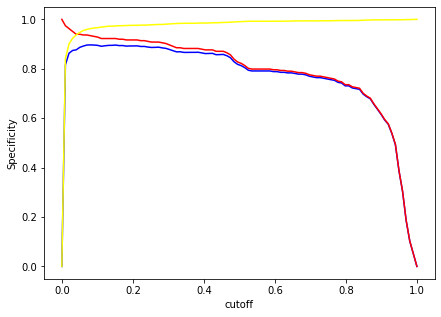

In [86]:
plt.figure(figsize=(7,5))
sns.lineplot(y="KS",x="cutoff",data=cutoff_data,c="blue" )
sns.lineplot(y="Sensitivity",x="cutoff",data=cutoff_data,c="red" )
sns.lineplot(y="Specificity",x="cutoff",data=cutoff_data, c="yellow")

In [ ]:
KS_cutoff=0.080808

In [41]:
predicted=xgb.predict_proba(x_test)[:,1]

In [42]:
predicted=np.where(predicted>0.545455,1,0)

In [43]:
predicted

array([0, 1, 0, ..., 1, 1, 1])

In [44]:
val_preds=pd.DataFrame({"real":y_test,"predicted":predicted})

In [45]:
val_preds

,real,predicted
3607,0,0
8384,1,1
1343,0,0
9634,1,1
6790,1,1
...,...,...
8811,1,1
934,0,0
9866,1,1
6859,1,1


In [46]:
    TP=len(val_preds[(val_preds["real"]==1)& (val_preds["predicted"]==1)])
    FP=len(val_preds[(val_preds["real"]==0)& (val_preds["predicted"]==1)])
    TN=len(val_preds[(val_preds["real"]==0)& (val_preds["predicted"]==0)])
    FN=len(val_preds[(val_preds["real"]==1)& (val_preds["predicted"]==0)])
    P=TP+FN
    N=FP+TN

In [47]:
sensitivity=(TP/P),
Specificity=(TN/N)
print(sensitivity,Specificity)

(0.960514233241506,) 0.9754768392370572


In [48]:
pd.crosstab(val_preds["real"],val_preds["predicted"])

predicted,0,1
real,,
0,1074,27
1,43,1046


In [92]:
caravan_test_score=xgb.predict_proba(caravan_test)[:,1]
caravan_test_score=np.where(caravan_test_score>0.080808,1,0)

caravan_test_score=pd.DataFrame({"prediction":caravan_test_score})

In [93]:
caravan_test_score.to_csv(r"C:\Users\Anand\Desktop\Python\Project-2\Anand_Project_3_prediction.csv")

In [554]:
train["V86"]=train["V86"].astype('object')

C:\Users\Anand\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
caravan_train=pd.read_csv(r"C:\Users\Anand\Desktop\Python\Project-2\carvan_train.csv")

In [66]:
caravan_train["V86"].value_counts()

0    5474
1     348
Name: V86, dtype: int64

In [70]:
x_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85
5893,34,1,2,3,8,1,4,0,3,7,...,0,0,0,0,1,0,0,0,0,0
9614,7,1,3,3,2,1,5,1,2,7,...,0,0,0,0,1,0,0,0,0,0
6856,40,1,3,2,9,0,6,0,2,8,...,0,0,0,0,1,0,0,0,0,0
1228,38,1,3,4,9,2,2,2,4,9,...,0,0,0,0,0,0,0,0,0,0
4920,37,1,4,3,8,3,5,1,2,8,...,0,0,0,0,1,0,0,0,0,0


In [75]:
caravan_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [76]:
x_caravan_train=caravan_train.drop('V86',axis=1)
y_caravan_train=caravan_train["V86"]